# Course project for Advanced Robotics

By Vladimir Klepikov and Oleg Ostapovich

We use open-source robot called [Thor](http://thor.angel-lm.com/)

Robot sizes

![image](http://thor.angel-lm.com/wp-content/uploads/2021/08/3285161470253430982.png)

In [1]:
import numpy as np
import roboticstoolbox as rtb
from scipy.spatial.transform import Rotation

In [2]:
L1 = rtb.RevoluteDH(d=0.202, a=0, offset=0, alpha=np.pi/2, m=0, r=[0, 0, 0])
L2 = rtb.RevoluteDH(d=0, a=0.160, offset=0, alpha=0, m=1, r=[0, 0, 0.101])
L3 = rtb.RevoluteDH(d=0, a=0, offset=0, alpha=-np.pi/2, m=1, r=[0, 0, 0.080])
L4 = rtb.RevoluteDH(d=0.195, a=0, offset=0, alpha=np.pi/2, m=1, r=[0, 0, 0.040])
L5 = rtb.RevoluteDH(d=0, a=0, offset=0, alpha=-np.pi/2, m=1, r=[0, 0, 0.140])
L6 = rtb.RevoluteDH(d=0.06715, a=0, offset=0, alpha=0, m=1, r=[0, 0, 0.035])

math_robot = rtb.DHRobot([L1, L2, L3, L4, L5, L6])


L1_real = rtb.RevoluteDH(d=L1.d+0.03, a=L1.a, offset=L1.offset, alpha=L1.alpha, m=L1.m, r=L1.r)
L2_real = rtb.RevoluteDH(d=L2.d, a=L2.a-0.02, offset=L2.offset, alpha=L2.alpha, m=L2.m, r=L2.r)
L3_real = rtb.RevoluteDH(d=L3.d, a=L3.a, offset=L3.offset, alpha=L3.alpha, m=L3.m, r=L3.r)
L4_real = rtb.RevoluteDH(d=L4.d-0.02, a=L4.a, offset=L4.offset, alpha=L4.alpha+0.01, m=L4.m, r=L4.r)
L5_real = rtb.RevoluteDH(d=L5.d, a=L5.a, offset=L5.offset, alpha=L5.alpha, m=L5.m, r=L5.r)
L6_real = rtb.RevoluteDH(d=L6.d+0.025, a=L6.a, offset=L6.offset, alpha=L6.alpha, m=L6.m, r=L6.r)

real_robot=rtb.DHRobot([L1_real,L2_real,L3_real,L4_real,L5_real,L6_real])

In [3]:
q_zeros = [0, 0, 0, 0, 0, 0]
q0 = [np.pi/3, np.pi/6,np.pi/4,np.pi/6,np.pi/6,np.pi/4]
q1 = [np.pi/2, np.pi/3,-np.pi/4,np.pi/2,np.pi/3,-np.pi/2]
q_used = q_zeros


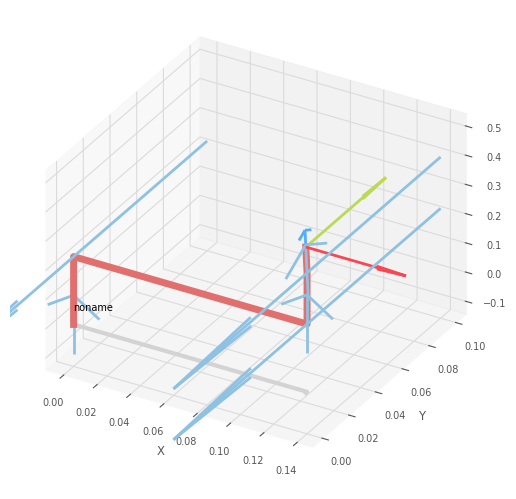

PyPlot3D backend, t = 0.05, scene:
  noname

<Figure size 640x480 with 0 Axes>

In [4]:
real_robot.plot(q_used,jointaxes=True)

In [5]:

q_real = np.random.rand(6) * np.pi / 2 - np.pi / 4
q_math = np.copy(q_real)

# Calculate the forward kinematics for both robots
T_real = real_robot.fkine(q_real)
T_math = math_robot.fkine(q_math)
T_ee_sensor = rtb.tools.r2t(Rotation.from_euler('xyz', [0, 0, 0], degrees=True).as_matrix(), [0, 0, 0])
T_base_marker = rtb.tools.r2t(Rotation.from_euler('xyz', [0, 0, 0], degrees=True).as_matrix(), [0, 0, 0])
T_end_effector_base = T_real @ np.linalg.inv(T_base_marker) @ T_ee_sensor @ np.linalg.inv(T_math)

T_sensor_ee = real_robot.fkine(q_used)

calibration_values = rtb.handeye(T_base_marker, T_sensor_ee, np.vstack([T_real, T_math]), q_real.reshape(-1, 1), q_math.reshape(-1, 1))

AttributeError: module 'roboticstoolbox.tools' has no attribute 'r2t'

In [ ]:
# Apply the calibration values to the DH parameters of the math_robot to create a new instance with calibrated DH parameters
calibrated_dh_params = np.array([a, alpha, d, theta]) + calibration_values
calibrated_robot = rtb.DHRobot(calibrated_dh_params[1], calibrated_dh_params[0], calibrated_dh_params[2], calibrated_dh_params[3])